### Trainer Video

In [34]:
import cv2
import time
import numpy as np

protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]


inWidth = 368
inHeight = 368
threshold = 0.1


net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


a="gpu"
if a == "cpu":
    net.setPreferableBackend(cv2.dnn.DNN_TARGET_CPU)
    print("Using CPU device")
    
elif a == "gpu":
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_DEFAULT)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL_FP16)
    print("Using GPU device")
    
Framecount=1

total_point=[]
cap = cv2.VideoCapture("mainmain.mp4") #<------------------------------------------File Name Here
while cv2.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if True:
            t = time.time()
            
            frameCopy = np.copy(frame)
            print(Framecount,end=" ")
            if not hasFrame:
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                break
            if Framecount%10==0:

                frameWidth = frame.shape[1]
                frameHeight = frame.shape[0]

                inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                                          (103.93, 116.77, 123.68), swapRB=False, crop=False)
                net.setInput(inpBlob)
                output = net.forward()

                H = output.shape[2]
                W = output.shape[3]
                # Empty list to store the detected keypoints
                points = []

                for i in range(nPoints):
                    # confidence map of corresponding body's part.
                    probMap = output[0, i, :, :]

                    # Find global maxima of the probMap.
                    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

                    # Scale the point to fit on the original image
                    x = (frameWidth * point[0]) / W
                    y = (frameHeight * point[1]) / H

                    if prob > threshold : 
                        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
                        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

                        # Add the point to the list if the probability is greater than the threshold
                        points.append((int(x), int(y)))
                    else :
                        points.append(None)
                total_point.append(points)

                # Draw Skeleton
                for pair in POSE_PAIRS:
                    partA = pair[0]
                    partB = pair[1]

                    if points[partA] and points[partB]:
                        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3, lineType=cv2.LINE_AA)
                        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
                        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
                temp1=time.time() - t
                cv2.putText(frame, "time taken = {:.4f} sec".format(temp1), (50, 50), cv2.FONT_HERSHEY_COMPLEX, .8, (255, 50, 0), 2, lineType=cv2.LINE_AA)
                cv2.imshow('frame', frame)
        
    if Framecount==300:
         cap.release()
         cv2.destroyAllWindows()
         break

    if cv2.waitKey(1) & 0xFF == ord('q'): 
         cap.release()
         cv2.destroyAllWindows()
         break

    Framecount+=1
    #vid_writer.write(frame)

cap.release()
cv2.destroyAllWindows()

Using GPU device
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273

In [35]:
#removing none
def remove_none(a):
    xs=[]
    ys=[]
    for i in range(len(a)):
        if a[i]!=None:
         xs.append(a[i][0])
         ys.append(a[i][1])
        else:
         xs.append(0)
         ys.append(0)           

    x_mean=sum(xs)/len(xs) 
    y_mean=sum(ys)/len(ys)
    for i in range(len(a)):
            if a[i]==None:
                a[i]=(x_mean,y_mean)
for j in total_point:
  
  remove_none(j)

In [36]:
#normalization
from sklearn.preprocessing import MinMaxScaler
total_updated_points=[]
v1x=[]
v1y=[]
scalar=MinMaxScaler()
for points in total_point:
  
  scalar.fit(points)
  #xs=[i[0] for i in points]
  #ys=[i[1] for i in points]
  op=scalar.transform(points)
  #x1=[(i-np.mean(xs))/(np.max(xs)-np.min(xs)) for i in xs]
  #y1=[(i-np.mean(ys))/(np.max(ys)-np.min(ys)) for i in ys]
    
  #X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 #X_scaled = X_std * (max - min) + min
  
  #x1=[ ((i-/(np.max(xs)-np.min(xs)))*(np.max(xs)-np.min(xs)))+np.min(xs) for i in xs ]
  #y1=[ ((i-np.min(ys)/(np.max(ys)-np.min(ys)))*(np.max(ys)-np.min(ys)))+np.min(ys) for i in ys ]
  x1=[i[0] for i in op]
  y1=[i[1] for i in op]
  v1x.append(x1)
  v1y.append(y1)
  updated_points=[]
  for i,j in zip(x1,y1):
    updated_points.append((i,j))
  total_updated_points.append(updated_points)


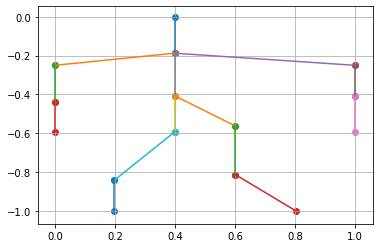

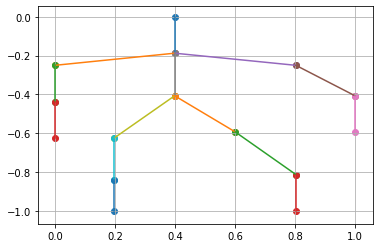

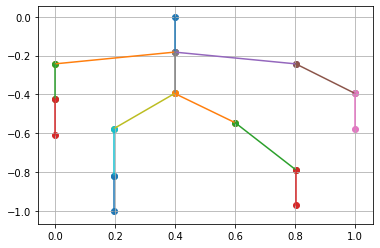

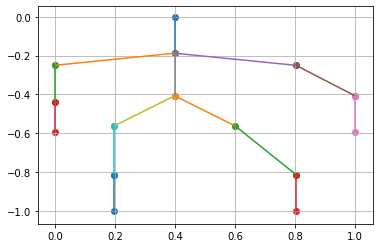

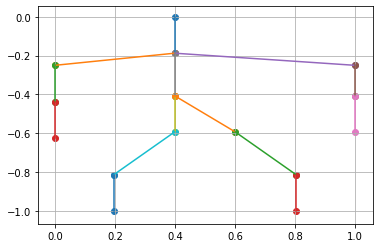

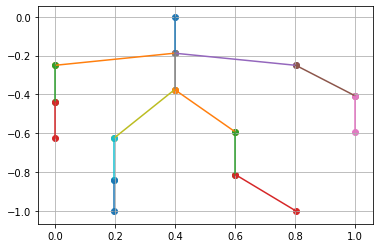

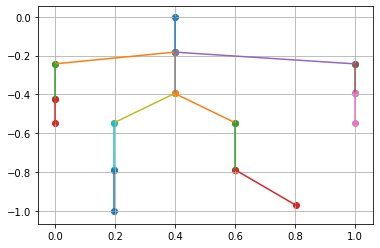

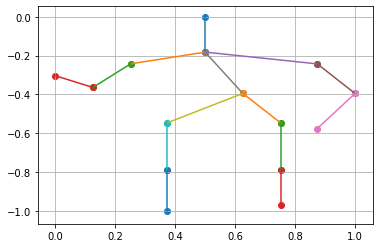

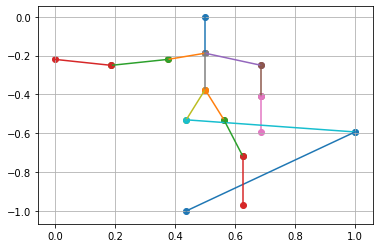

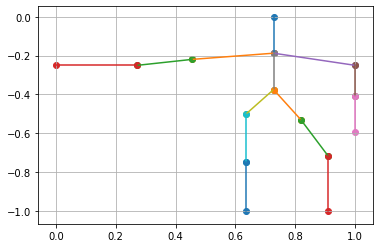

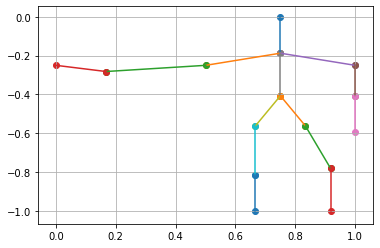

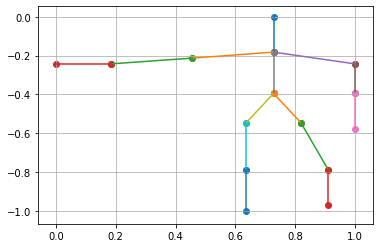

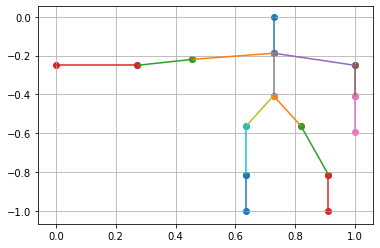

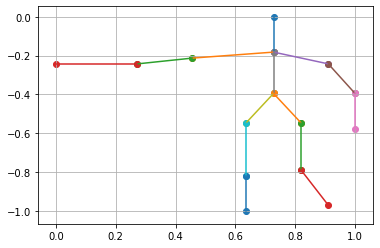

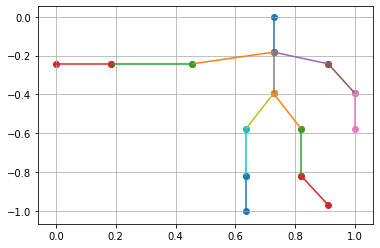

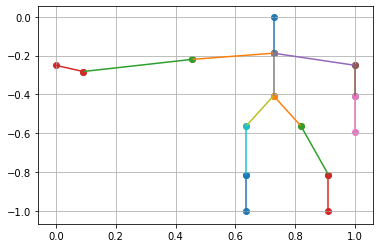

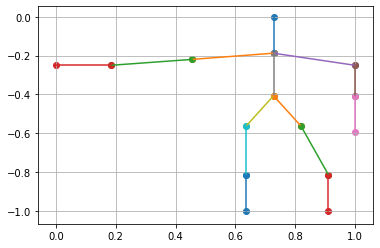

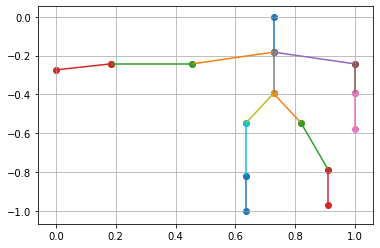

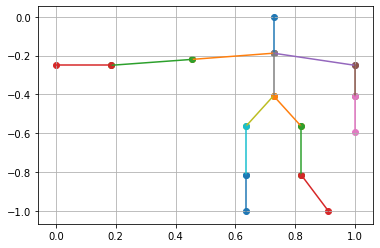

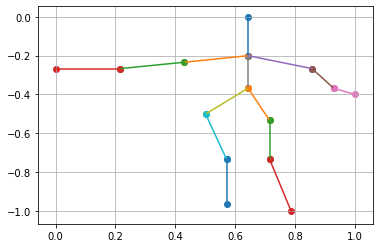

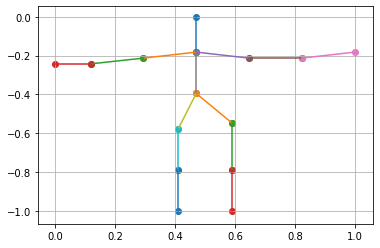

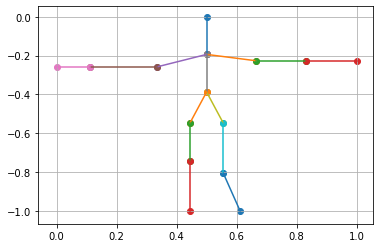

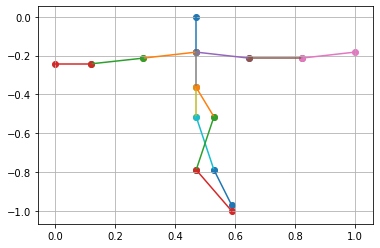

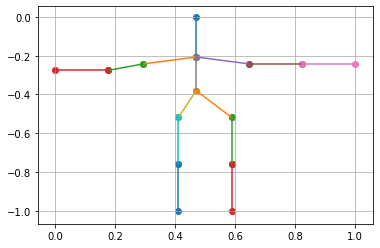

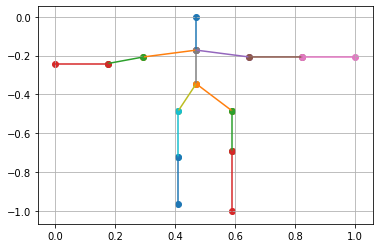

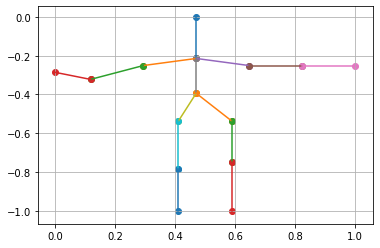

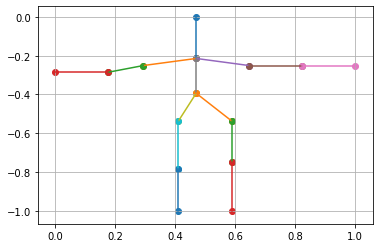

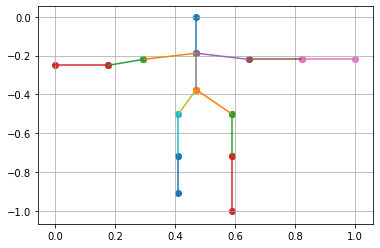

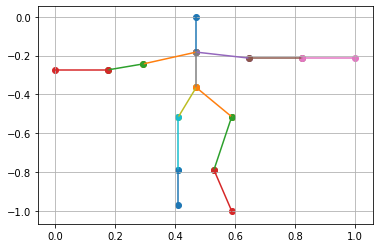

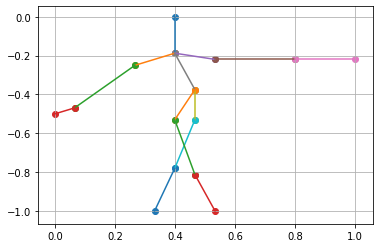

In [37]:
#After the normazation
import matplotlib.pyplot as plt
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
for updated_points in total_updated_points:
  for pair in POSE_PAIRS:
            xt=[]
            yt=[]
            partA = pair[0]
            partB = pair[1]

            if updated_points[partA] and updated_points[partB]:
        
                xt.append(updated_points[partA][0])
                xt.append(updated_points[partB][0])
                yt.append(-1*updated_points[partA][1])
                yt.append(-1*updated_points[partB][1])
                plt.plot(xt,yt)
                plt.scatter(xt,yt)
  plt.grid()              
  plt.show()
            

### Client Video

In [49]:
import cv2
import time
import numpy as np

protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]


inWidth = 368
inHeight = 368
threshold = 0.1


net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


a="gpu"
if a == "cpu":
    net.setPreferableBackend(cv2.dnn.DNN_TARGET_CPU)
    print("Using CPU device")
    
elif a == "gpu":
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_DEFAULT)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL_FP16)
    print("Using GPU device")
    
Framecount=1
total_point1=[]
cap = cv2.VideoCapture("main_repeat.mp4") #<----------------------------File Name / Real Time Video Here
while cv2.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if Framecount%10==0:
            t = time.time()
            
            frameCopy = np.copy(frame)
            print(Framecount,end=" ")
            if not hasFrame:
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                break
            if Framecount%10==0:

                frameWidth = frame.shape[1]
                frameHeight = frame.shape[0]

                inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                                          (103.93, 116.77, 123.68), swapRB=False, crop=False)
                net.setInput(inpBlob)
                output = net.forward()

                H = output.shape[2]
                W = output.shape[3]
                # Empty list to store the detected keypoints
                points = []

                for i in range(nPoints):
                    # confidence map of corresponding body's part.
                    probMap = output[0, i, :, :]

                    # Find global maxima of the probMap.
                    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

                    # Scale the point to fit on the original image
                    x = (frameWidth * point[0]) / W
                    y = (frameHeight * point[1]) / H

                    if prob > threshold : 
                        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
                        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

                        # Add the point to the list if the probability is greater than the threshold
                        points.append((int(x), int(y)))
                    else :
                        points.append(None)
                total_point1.append(points)

                # Draw Skeleton
                for pair in POSE_PAIRS:
                    partA = pair[0]
                    partB = pair[1]

                    if points[partA] and points[partB]:
                        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3, lineType=cv2.LINE_AA)
                        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
                        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
                temp1=time.time() - t
                cv2.putText(frame, "time taken = {:.4f} sec".format(temp1), (50, 50), cv2.FONT_HERSHEY_COMPLEX, .8, (255, 50, 0), 2, lineType=cv2.LINE_AA)
                cv2.imshow('frame', frame) 
    if Framecount==300:
            break
    if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
            
    Framecount+=1

cap.release()
cv2.destroyAllWindows()




Using GPU device
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 

In [50]:
#removing none
def remove_none(a):
    xs=[]
    ys=[]
    for i in range(len(a)):
        if a[i]!=None:
         xs.append(a[i][0])
         ys.append(a[i][1])
        else:
         xs.append(0)
         ys.append(0)           

    x_mean=sum(xs)/len(xs) 
    y_mean=sum(ys)/len(ys)
    for i in range(len(a)):
            if a[i]==None:
                a[i]=(x_mean,y_mean)
for j in total_point1:
  
  remove_none(j)

In [51]:
#normalization
total_updated_points1=[]
v2x=[]
v2y=[]
scalar=MinMaxScaler()

for points in total_point1:
  #xs=[i[0] for i in points]
  #ys=[i[1] for i in points]
  scalar.fit(points)

  op=scalar.transform(points)

  x1=[i[0] for i in op]
  y1=[i[1] for i in op]
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

  #x1=[(i-np.mean(xs))/(np.max(xs)-np.min(xs)) for i in xs] 
  #y1=[(i-np.mean(ys))/(np.max(ys)-np.min(ys)) for i in ys]
  #x1=[ ((i-np.min(xs)/(np.max(xs)-np.min(xs)))*(np.max(xs)-np.min(xs)))+np.min(xs) for i in xs ]
  #y1=[ ((i-np.min(ys)/(np.max(ys)-np.min(ys)))*(np.max(ys)-np.min(ys)))+np.min(ys) for i in ys ]
  v2x.append(x1)
  v2y.append(y1)
  updated_points=[]
  for i,j in zip(x1,y1):
    updated_points.append((i,j))
  total_updated_points1.append(updated_points)


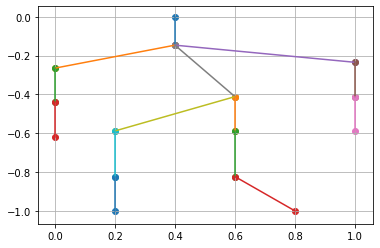

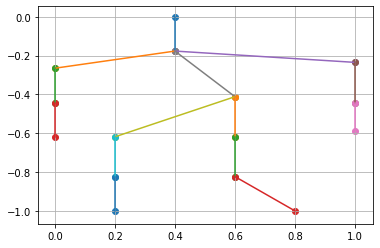

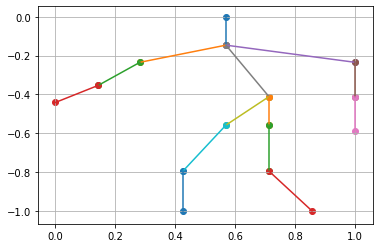

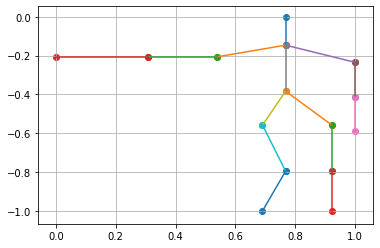

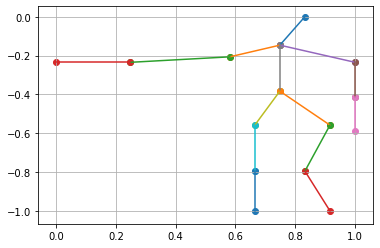

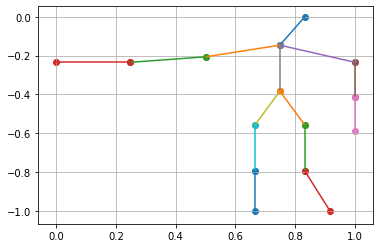

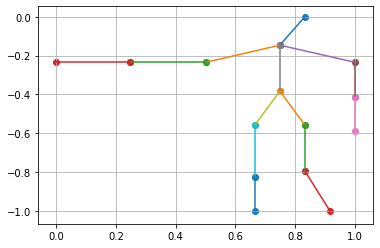

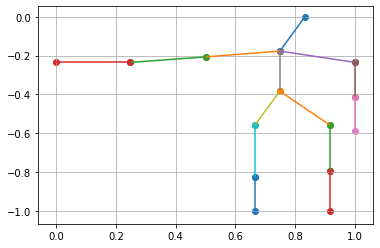

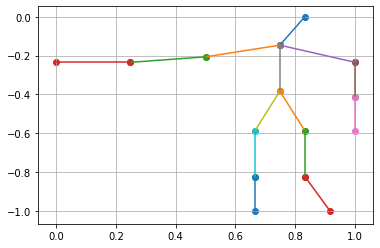

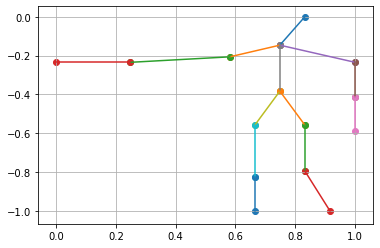

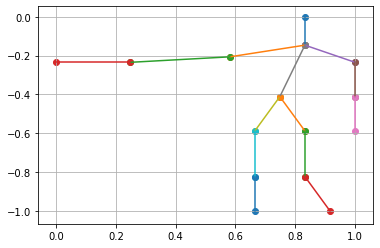

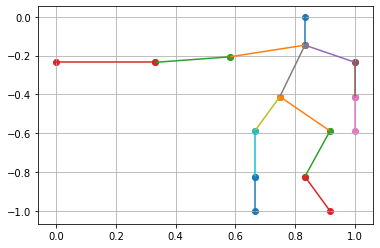

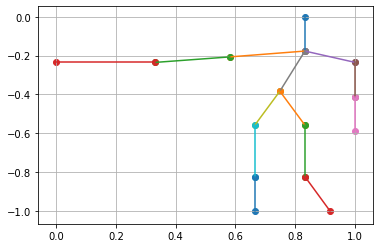

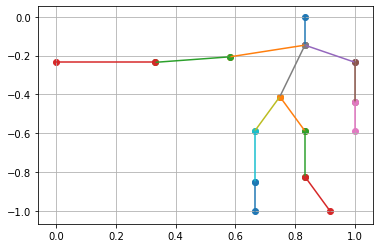

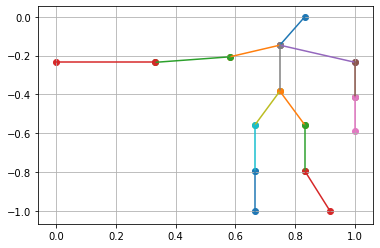

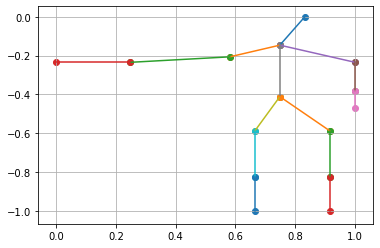

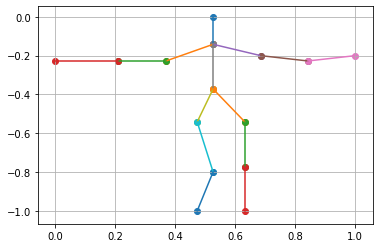

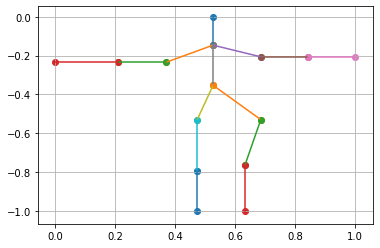

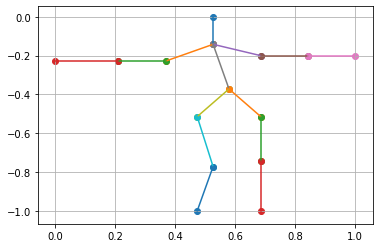

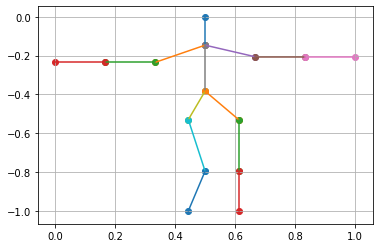

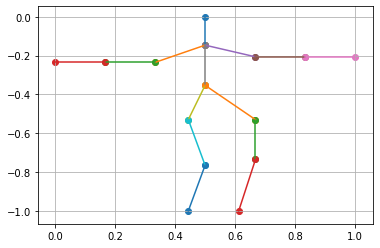

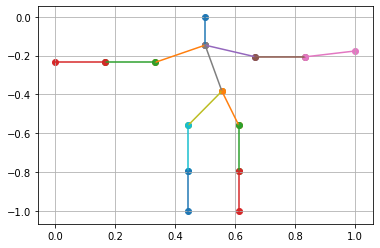

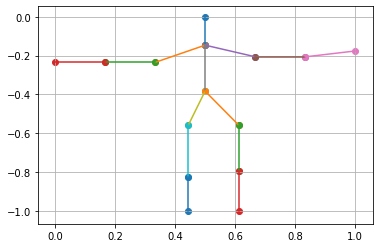

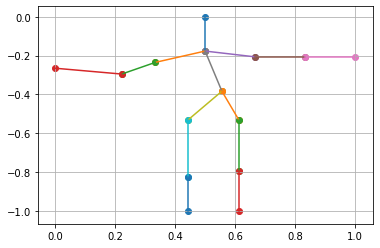

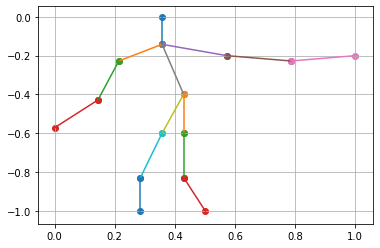

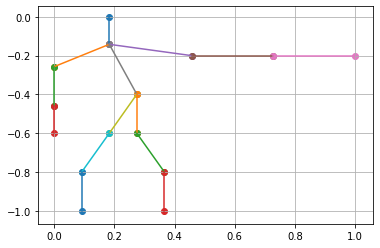

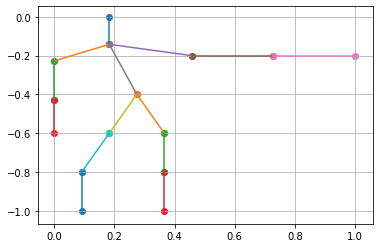

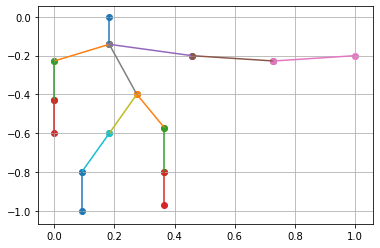

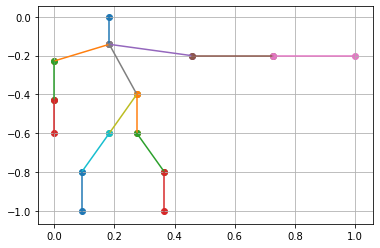

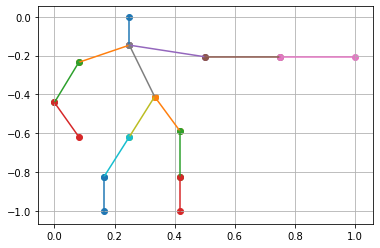

In [52]:
#After the normazation
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
for updated_points in total_updated_points1:
  for pair in POSE_PAIRS:
            xt=[]
            yt=[]
            partA = pair[0]
            partB = pair[1]

 

            if updated_points[partA] and updated_points[partB]:
        
                xt.append(updated_points[partA][0])
                xt.append(updated_points[partB][0])
                yt.append(-1*updated_points[partA][1])
                yt.append(-1*updated_points[partB][1])
                plt.plot(xt,yt)
                plt.scatter(xt,yt)
                
  plt.grid()              
  plt.show()
            

### Comparing Video

In [53]:
#making framecount equal for both videos
a=len(v1x)
b=len(v2x)
if a!=b:
    c=min(a,b)
    v1x=v1x[:c]
    v1y=v1y[:c]
    v2x=v2x[:c]
    v2y=v2y[:c]
    print("Changed...")

In [54]:
#With Static S.D (X,Y Coord)
sigma=1
x_score=[]
y_score=[]
xy_score=[]
for i in range(len(v1x)):
    x_score.append(np.exp((-(np.linalg.norm(np.array(v1x[i])-np.array(v2x[i]))**2))/(2*sigma**2)))
    y_score.append(np.exp((-(np.linalg.norm(np.array(v1y[i])-np.array(v2y[i]))**2))/(2*sigma**2)))
    xy_score.append((x_score[i]+y_score[i])/2)
    print("Score",xy_score[i])
    print("X similar",x_score[i])
    print("Y similar",y_score[i])

Score 0.979376088909
X similar 0.9607747822506716
Y similar 0.9979773955673285
Score 0.9700096044586338
X similar 0.9415581969138798
Y similar 0.9984610120033879
Score 0.868581066766317
X similar 0.7550954614013209
Y similar 0.9820666721313129
Score 0.6564223666369962
X similar 0.41138585573026654
Y similar 0.9014588775437259
Score 0.6942218847344919
X similar 0.48385122323634056
Y similar 0.9045925462326432
Score 0.6806153213325439
X similar 0.45878898104445415
Y similar 0.9024416616206337
Score 0.7004188130274184
X similar 0.4677891244027044
Y similar 0.9330485016521323
Score 0.8584981066581205
X similar 0.729753810494859
Y similar 0.9872424028213822
Score 0.7907511535635084
X similar 0.6180225837155849
Y similar 0.963479723411432
Score 0.9863512688420277
X similar 0.9817095362678752
Y similar 0.9909930014161804
Score 0.9892670099478786
X similar 0.9832940734346766
Y similar 0.9952399464610806
Score 0.9785004897774463
X similar 0.9615551138757852
Y similar 0.9954458656791075
Score 0.

In [55]:
#Thrshold function 
def check3(a):
    if a>=0.92:
        return True
    return False

In [56]:
good=0
for i in range(0,len(xy_score),3):
    temp=xy_score[i:i+3]
    if len(temp)==3:
        temp1=sum(map(check3,temp))
        if temp1>=2:
            good+=3
            
            print("Good",temp)
        else:
            print("Bad",temp)
    else:
        good=good+sum(map(check3,temp))
    

Good [0.979376088909, 0.9700096044586338, 0.868581066766317]
Bad [0.6564223666369962, 0.6942218847344919, 0.6806153213325439]
Bad [0.7004188130274184, 0.8584981066581205, 0.7907511535635084]
Good [0.9863512688420277, 0.9892670099478786, 0.9785004897774463]
Good [0.9870848379137318, 0.9842880136502117, 0.9836111540501538]
Bad [0.9789156340515592, 0.8414227848594398, 0.845480118183963]
Good [0.8614747349741856, 0.9340921002850251, 0.9900233786435408]
Good [0.5902819836109512, 0.9823361492899396, 0.9927475998473001]
Bad [0.9179565113557064, 0.8005554894910356, 0.8053927429602623]
Bad [0.7932803131961672, 0.7994213742945578, 0.9317545125171127]


In [57]:
print(str(round((good/len(xy_score))*100,2))+"% good")

#64.29% good
#70
#28.57% good
7.14% good


50.0% good


7.14

In [64]:
sum(x_score)/len(x_score),sum(y_score)/len(y_score)

(0.7858445132596107, 0.9590309939290045)